### This notebook simply merges both datasets and shows what that dataframe looks like. 

In [16]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time
#import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
os.chdir('C:\\Users\\mohse\\Documents\\Capstone Project')
cwd = os.getcwd()
print(cwd)

C:\Users\mohse\Documents\Capstone Project


In [3]:
businessCSV = pd.read_csv('BusinessDF.csv')

In [21]:
reviewCSV = pd.read_csv('reviewDF.csv')

In [22]:
# to ignore some of the warnings that pop up later in the notebook
import warnings
warnings.filterwarnings('ignore')

In [24]:
#rename review col "stars"

reviewCSV.rename(columns=({"stars":"reviews_stars"}), inplace=True)
#reviewCSV.to_csv("ReviewDF.csv", index=False)

In [25]:
reviewCSV.head()

,business_id,reviews_stars,useful,text
0,xGXzsc-hzam-VArK6eTvtw,1.0,2,"This place used to be a cool, chill place. Now..."
1,DbXHNl890xSXNiyRczLWAg,5.0,0,Probably one of the better breakfast sandwiche...
2,KXCXaF5qimmtKKqnPc_LQA,1.0,0,Great coffee and pastries. Baristas are excell...
3,vRrDTIW9IFBO4cc3laazUw,5.0,0,So sad to learn they are demolishing this. Alw...
4,VPqWLp9kMiZEbctCebIZUA,3.0,0,"Overall is good, is worth the line up I don't ..."


In [7]:
#rename business col "stars" as well

businessCSV.rename(columns=({"stars":"business_stars"}), inplace=True)
#businessCSV.to_csv("BusinessDF.csv", index=False)

businessCSV.head()

,business_id,name,city,state,business_stars,review_count,attributes,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,CO,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,Portland,OR,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,Portland,OR,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,Orange City,FL,3.0,8,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons"
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,Atlanta,GA,4.0,14,"{'GoodForKids': 'False', 'BusinessParking': ""{...","Gyms, Active Life, Interval Training Gyms, Fit..."


### Both files have been read in here as csv. 
### Now I'll merge them

In [8]:
# using merge function by setting how='inner'

output1 = pd.merge(businessCSV, reviewCSV, 
                   on='business_id', 
                   how='inner')
  
output1.to_csv("MergedDF.csv", index=False)

In [9]:
mergedDF = pd.read_csv("MergedDF.csv")

In [19]:
mergedDF.head()

,business_id,name,city,state,business_stars,review_count,attributes,categories,reviews_stars,useful,text
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,CO,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",5.0,1,Stopped in on a busy Friday night. Despite the...
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,CO,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",2.0,0,Went there about 1 PM on a Monday. It wasn't ...
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,CO,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",5.0,0,This was the place the be on Friday Night! If ...
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,CO,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",4.0,0,Went to this place with my family over the wee...
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,CO,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",4.0,0,"Stopped on a midweek afternoon, and so glad th..."


In [15]:
mergedDF.describe()

,business_stars,review_count,reviews_stars,useful
count,2.618511e+06,2.618511e+06,2.618511e+06,2.618511e+06
mean,3.809849e+00,3.483745e+02,3.768980e+00,8.943560e-01
std,7.675753e-01,6.633345e+02,1.547977e+00,3.225354e+00
min,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00
25%,3.500000e+00,4.700000e+01,3.000000e+00,0.000000e+00
50%,4.000000e+00,1.420000e+02,5.000000e+00,0.000000e+00
75%,4.500000e+00,3.720000e+02,5.000000e+00,1.000000e+00
max,5.000000e+00,9.185000e+03,5.000000e+00,4.460000e+02


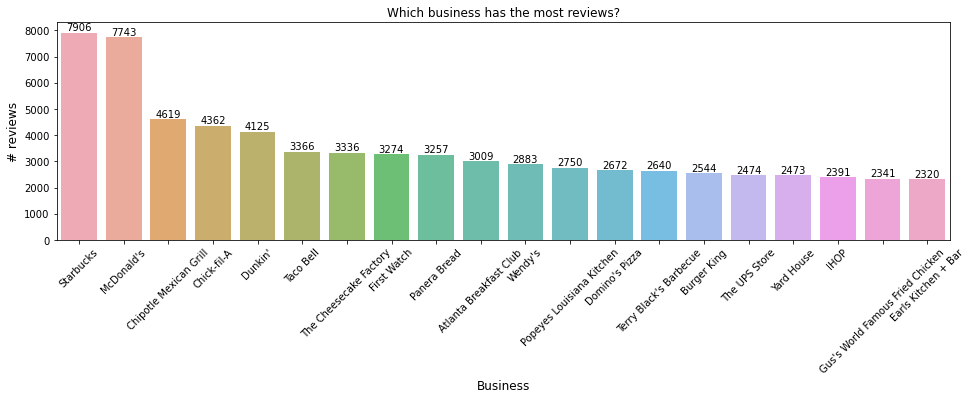

In [26]:
# Adding another graph here that shows the distribution of the ratings per business
# starbucks and mcdonalds get the most number of reviews for restaurant category. 


x = mergedDF['name'].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which business has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# reviews', fontsize=12)
plt.xlabel('Business', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()